import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Use code with caution
import cv2: Imports the OpenCV (cv2) library, which is used for computer vision tasks like reading and manipulating images.
import numpy as np: Imports the NumPy library as np, which is used for numerical operations, especially on arrays.
import matplotlib.pyplot as plt: Imports the Matplotlib library's pyplot module as plt, which is used for creating plots and visualizations.
from sklearn.cluster import KMeans: Imports the KMeans class from scikit-learn, used for K-means clustering.
The segment_image Function

def segment_image(image_path, k=3):
    # ... (code inside the function) ...
Use code with caution
This defines a function called segment_image that takes the image_path (location of the image file) and k (the number of clusters for K-means) as input. The default value for k is 3.

Inside the Function
Reading and Preparing the Image

image = cv2.imread(image_path)
   image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   pixels = image_rgb.reshape((-1, 3))
Use code with caution
cv2.imread(image_path): Reads the image from the given image_path and stores it in the image variable.
cv2.cvtColor(image, cv2.COLOR_BGR2RGB): Converts the image from BGR (Blue, Green, Red) color format to RGB (Red, Green, Blue) because OpenCV reads images in BGR by default, but most other libraries expect RGB. The converted image is stored in image_rgb.
image_rgb.reshape((-1, 3)): Reshapes the `image_rgb


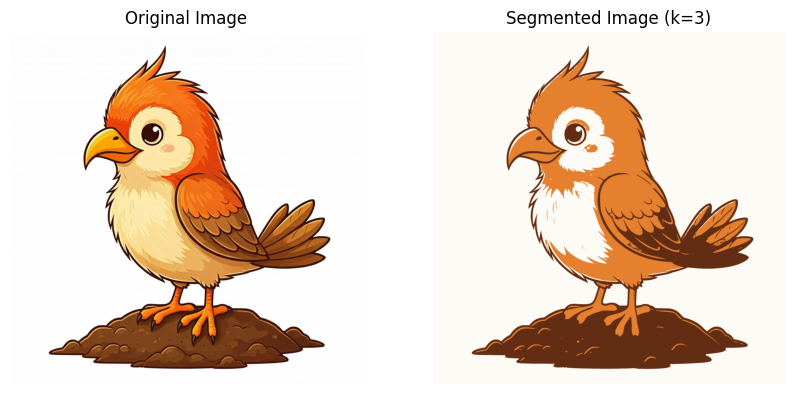

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform image segmentation using K-means clustering
def segment_image(image_path, k=3):
    # Read the image
    image = cv2.imread(image_path)

    # Convert image from BGR to RGB (OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels (rows: pixels, columns: RGB values)
    pixels = image_rgb.reshape((-1, 3))

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    # Get the cluster centers (RGB values)
    cluster_centers = kmeans.cluster_centers_.astype(int)

    # Assign each pixel to the nearest cluster center
    segmented_img = cluster_centers[kmeans.labels_].reshape(image_rgb.shape)

    # Plot the original and segmented images side by side
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Plot segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img)
    plt.title(f"Segmented Image (k={k})")
    plt.axis('off')

    plt.show()

    # Optionally, return the segmented image if needed
    return segmented_img

# Example usage
image_path = '/content/right.jpg'  # Replace with your image path
k = 3  # Number of clusters (you can adjust this)
segmented_image = segment_image(image_path, k)


Importing Libraries

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab
Use code with caution
import cv2: This line imports the OpenCV (cv2) library, which is essential for working with images in Python. It provides functions for reading, writing, manipulating, and displaying images.
import numpy as np: This line imports the NumPy library and gives it the alias np. NumPy is used for numerical operations and working with arrays, which are crucial for image processing as images are represented as arrays of pixels.
from google.colab.patches import cv2_imshow: This line is specific to Google Colab environments. It imports the cv2_imshow function to display images directly within the Colab notebook.
Loading the Image

# Load the image
image = cv2.imread('/content/green nature.png')
Use code with caution
cv2.imread('/content/green nature.png'): This function from OpenCV reads the image file located at the specified path ('/content/green nature.png') and loads it into the image variable.
Color Space Conversion

# Convert the image from BGR to HSV (better for color manipulation)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
Use code with caution
cv2.cvtColor(image, cv2.COLOR_BGR2HSV): This converts the image from the BGR (Blue, Green, Red) color space, which is the default format OpenCV uses, to the HSV (Hue, Saturation, Value) color space. HSV is often preferred for color-based operations because it separates color information (hue) from brightness (value) and intensity (saturation), making it easier to isolate specific colors.
Defining the Green Color Range

# Define the range of green color in HSV
# These values can be adjusted depending on the shade of green you want to remove
lower_green = np.array([35, 50, 50])


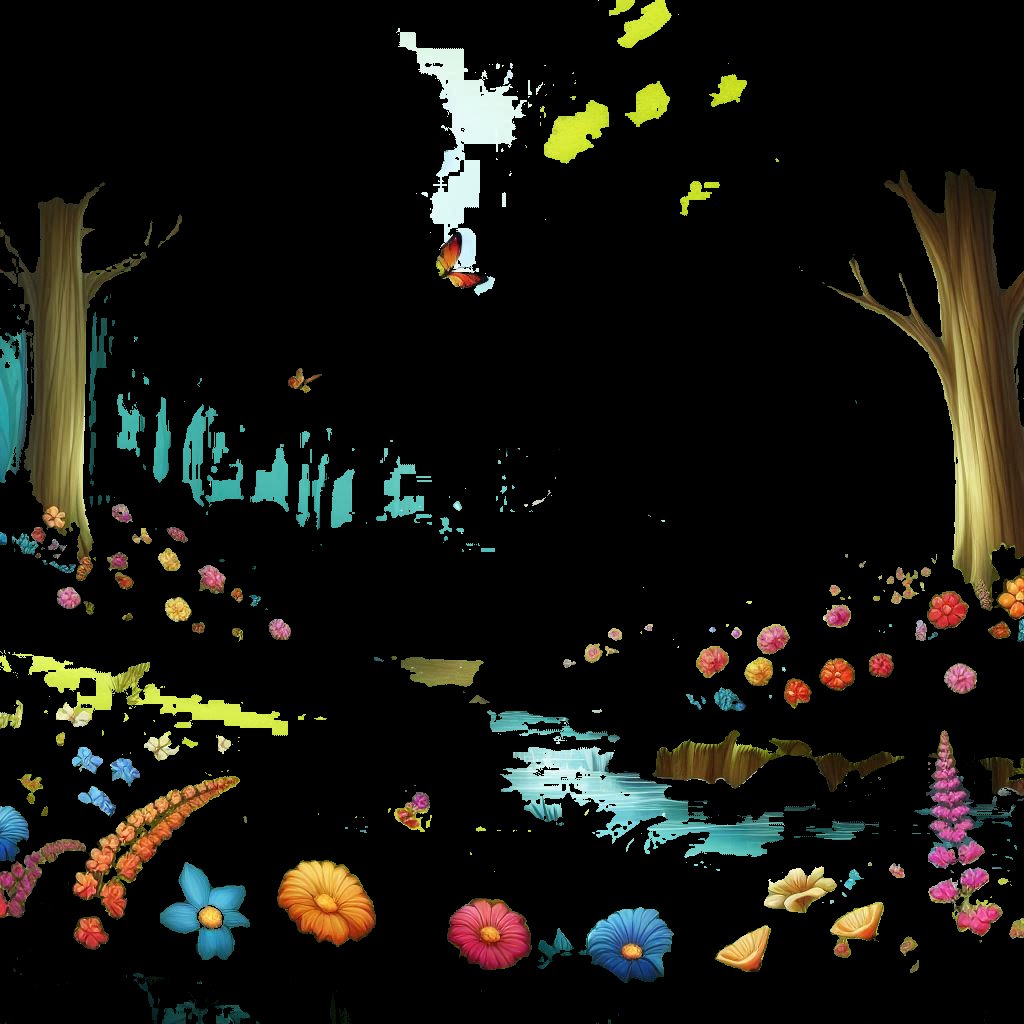

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Load the image
image = cv2.imread('/content/green nature.png')

# Convert the image from BGR to HSV (better for color manipulation)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of green color in HSV
# These values can be adjusted depending on the shade of green you want to remove
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Create a mask that identifies the green areas
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Invert the mask to get everything except the green areas
inverse_mask = cv2.bitwise_not(green_mask)

# Apply the inverse mask to the image (keeping everything except green)
result = cv2.bitwise_and(image, image, mask=inverse_mask)

# Optionally, you can replace green areas with white or black
# For example, to make the green areas black:
image[green_mask > 0] = [0, 0, 0]  # Set green areas to black

# Save the output image
cv2.imwrite('output_image.jpg', image)

# Use cv2_imshow to display the image in Colab
cv2_imshow(result)

# Make sure to release resources when done
cv2.waitKey(0)
cv2.destroyAllWindows()


Here's a step-by-step explanation:

Importing Libraries:

import cv2
   import numpy as np
Use code with caution
import cv2: Imports the OpenCV library for computer vision tasks.
import numpy as np: Imports the NumPy library for numerical operations, particularly for working with arrays.
Loading Images:

# Load the left and right images
   imgL = cv2.imread('/content/left.jpg')
   imgR = cv2.imread('/content/right.jpg')
Use code with caution
cv2.imread('/content/left.jpg'): Loads the left stereo image from the specified path and stores it in the imgL variable.
cv2.imread('/content/right.jpg'): Loads the right stereo image and stores it in the imgR variable.
Converting to Grayscale:

# Convert to grayscale
   grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
   grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
Use code with caution
cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY): Converts the left image (imgL) from color (BGR format) to grayscale and stores it in grayL.
cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY): Does the same for the right image, storing the result in grayR. Grayscale conversion is often a preprocessing step for stereo vision algorithms.
Creating a StereoBM Object:

# Create StereoBM object
   stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
Use code with caution
cv2.StereoBM_create(): Creates an instance of the StereoBM algorithm, which is a block-matching algorithm used for stereo correspondence.
numDisparities=16: Sets the maximum disparity search range. This value should be a multiple of 16.
blockSize=15: Sets the size of the blocks used for matching. Larger block sizes can handle more texture but may blur finer details.
Computing the Disparity Map:

# Compute disparity map
   disparity = stereo.compute(grayL, grayR)
Use code with caution
stereo.compute(grayL, grayR): This line is where the actual disparity calculation happens. The stereo object (configured with StereoBM) processes the grayscale left and right images to generate a disparity map, which is stored in the disparity variable.
Normalizing the Disparity Map:

# Normalize the disparity map for visualization
   disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
Use code with caution
cv2.normalize(...): Normalizes the disparity map values to a range of 0-255 so that it can be displayed as an image. This makes the disparity values visible to the human eye.
Displaying and Cleaning Up:

# Display the disparity map

   cv2.waitKey(0)
   cv2.destroyAllWindows()
Use code with caution
These lines were likely intended to display the disparity map using OpenCV's display functions (which are not included in the provided snippet).
cv2.waitKey(0): Waits for a key press before closing the display window (if it were present).
cv2.destroyAllWindows(): Closes all OpenCV windows.

In [28]:
import cv2
import numpy as np

# Load the left and right images
imgL = cv2.imread('/content/left.jpg')
imgR = cv2.imread('/content/right.jpg')

# Convert to grayscale
grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# Create StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

# Compute disparity map
disparity = stereo.compute(grayL, grayR)

# Normalize the disparity map for visualization
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the disparity map

cv2.waitKey(0)
cv2.destroyAllWindows()

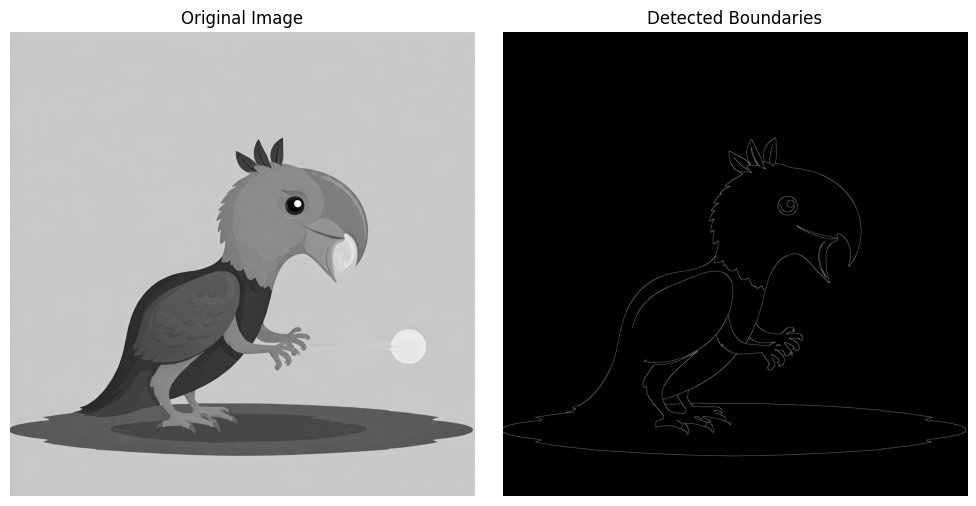

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/left.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny Edge Detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Boundaries')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


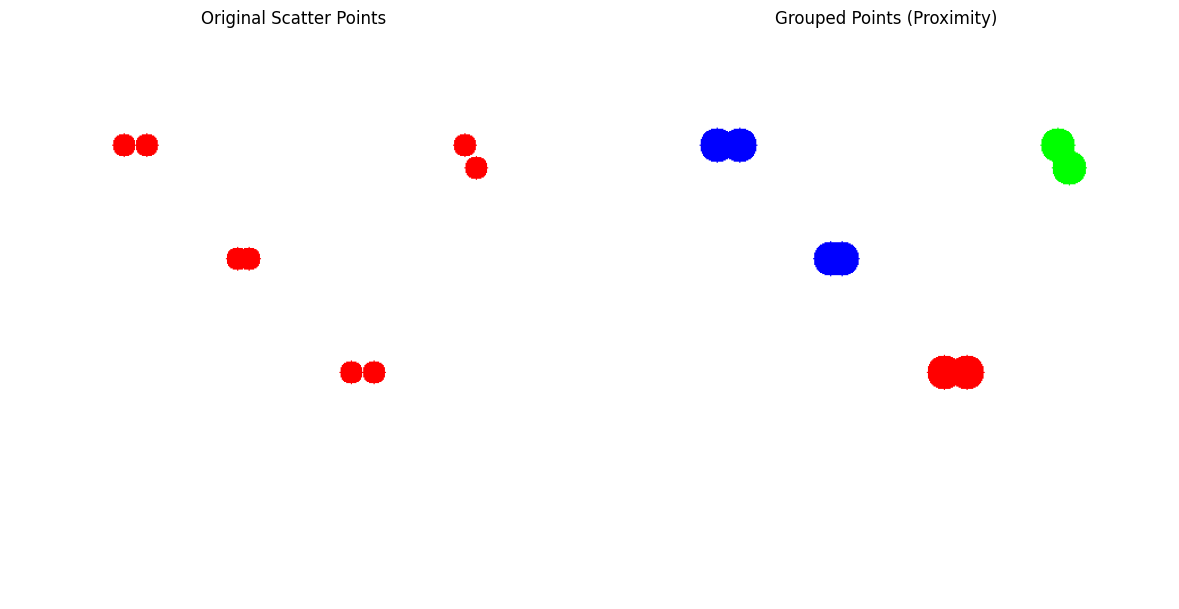

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank image with some scattered points (Gestalt grouping example)
image = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Define coordinates for points
points = [
    (100, 100), (120, 100), (200, 200), (210, 200),
    (300, 300), (320, 300), (400, 100), (410, 120)
]

# Draw circles at these points
for point in points:
    cv2.circle(image, point, 10, (0, 0, 255), -1)

# Show the original image with points
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Scatter Points')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Apply Gestalt: Proximity grouping
# Use clustering (K-means) to group points based on proximity
points_np = np.array(points, dtype=np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of groups (clusters)
_, labels, centers = cv2.kmeans(points_np, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Visualize the groups with different colors
grouped_image = image.copy()
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Define colors for groups

for i, point in enumerate(points):
    group_color = colors[labels[i][0]]
    cv2.circle(grouped_image, tuple(point), 15, group_color, -1)

# Display the grouped image
plt.subplot(1, 2, 2)
plt.title('Grouped Points (Proximity)')
plt.imshow(cv2.cvtColor(grouped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


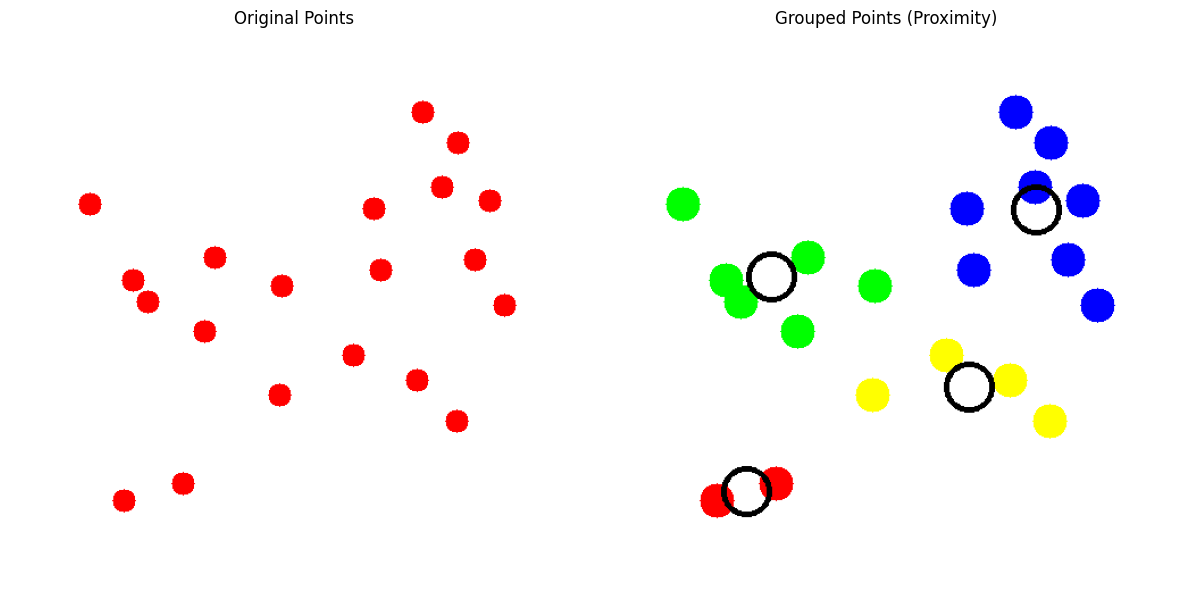

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank image
image = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Define random points
np.random.seed(42)  # For reproducibility
points = np.random.randint(50, 450, (20, 2))  # Generate 20 random points within the image

# Draw the points on the image
for point in points:
    cv2.circle(image, tuple(point), 10, (0, 0, 255), -1)

# Show the original scatter points
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Points')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Grouping using K-Means clustering (Proximity)
points_float = points.astype(np.float32)
k = 4  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(points_float, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Visualize grouped points
grouped_image = image.copy()
colors = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (255, 0, 255), (255, 255, 0)
]  # Define colors for up to 6 clusters

# Draw points with their cluster colors
for i, point in enumerate(points):
    group_color = colors[labels[i][0] % len(colors)]
    cv2.circle(grouped_image, tuple(point), 15, group_color, -1)

# Draw cluster centers
for center in centers:
    cv2.circle(grouped_image, tuple(center.astype(int)), 20, (0, 0, 0), 3)

# Show the grouped points
plt.subplot(1, 2, 2)
plt.title('Grouped Points (Proximity)')
plt.imshow(cv2.cvtColor(grouped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


1. Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
Use code with caution
import cv2: Imports the OpenCV library (cv2), which is widely used for computer vision tasks like image processing.
import numpy as np: Imports the NumPy library (np), essential for numerical operations, especially on arrays (which are used to represent images).
import matplotlib.pyplot as plt: Imports the Matplotlib library's pyplot module (plt), used for creating plots and visualizations, in this case, for displaying images.
2. Loading Stereo Images

left_image = cv2.imread('/content/left.jpg', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('/content/right.jpg', cv2.IMREAD_GRAYSCALE)
Use code with caution
cv2.imread(...): This function reads the left and right stereo images from the specified file paths ('/content/left.jpg' and '/content/right.jpg').
cv2.IMREAD_GRAYSCALE: This flag tells cv2.imread to load the images as grayscale, meaning they'll have only one color channel (intensity) instead of three (red, green, blue).
3. Stereo Calibration Parameters

focal_length = 1.0  # Example focal length (in pixels)
baseline = 0.1  # Example baseline between cameras (in meters)
Use code with caution
focal_length: Represents the focal length of the camera used to capture the images. It's a crucial parameter for depth estimation. Here, it's set to 1.0 as an example.
baseline: Represents the distance between the two cameras in the stereo setup. It's another critical parameter for depth calculation. Here, it's set to 0.1 meters as an example. In a real application, these values would need to be calibrated or measured accurately.
4. Computing the Disparity Map

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left_image, right_image)
Use code with caution
cv2.StereoBM_create(...): This creates an object (stereo) that implements the Stereo Block Matching (SBM) algorithm. SBM is used to find corresponding points between the left and right images.
numDisparities=16: Sets the maximum disparity search range. This value needs to be a multiple of 16.
blockSize=15: Determines the size of the blocks used for matching. Larger blocks can handle more texture but may result in less precise disparity estimates.
stereo.compute(...): This line applies the SBM algorithm to the left and right images to calculate the disparity map. The disparity map (disparity) is an image where each pixel value represents the difference in horizontal position (disparity) of corresponding points in the two images. This disparity is directly related to depth—larger disparities generally indicate closer objects.
5. Normalizing and Displaying the Disparity Map

disparity_normalized = cv2.normalize(disparity, disparity, 0, 255, cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# ... (code for displaying the disparity map using Matplotlib) ...
Use code with caution
cv2.normalize(...): This function normalizes the disparity map's values to a range of 0-255, making it suitable for display as an image.
np.uint8(...): Converts the normalized disparity map to an 8-bit unsigned integer data type, which is a common format for images.
The remaining lines use Matplotlib (plt) to display the original left image and the normalized disparity map side-by-side for comparison.
6. Calculating and Displaying the Depth Map

depth_map = (focal_length * baseline) / (disparity.astype(np.float32) + 1e-5)  # Avoid division by zero

# ... (code for displaying the depth map using Matplotlib) ...
Use code with caution
depth_map = ...: This line calculates the depth map using the formula: depth = (focal_length * baseline) / disparity.
+ 1e-5 is added to the disparity to prevent division by zero errors.
The code then uses Matplotlib to display the depth map, often

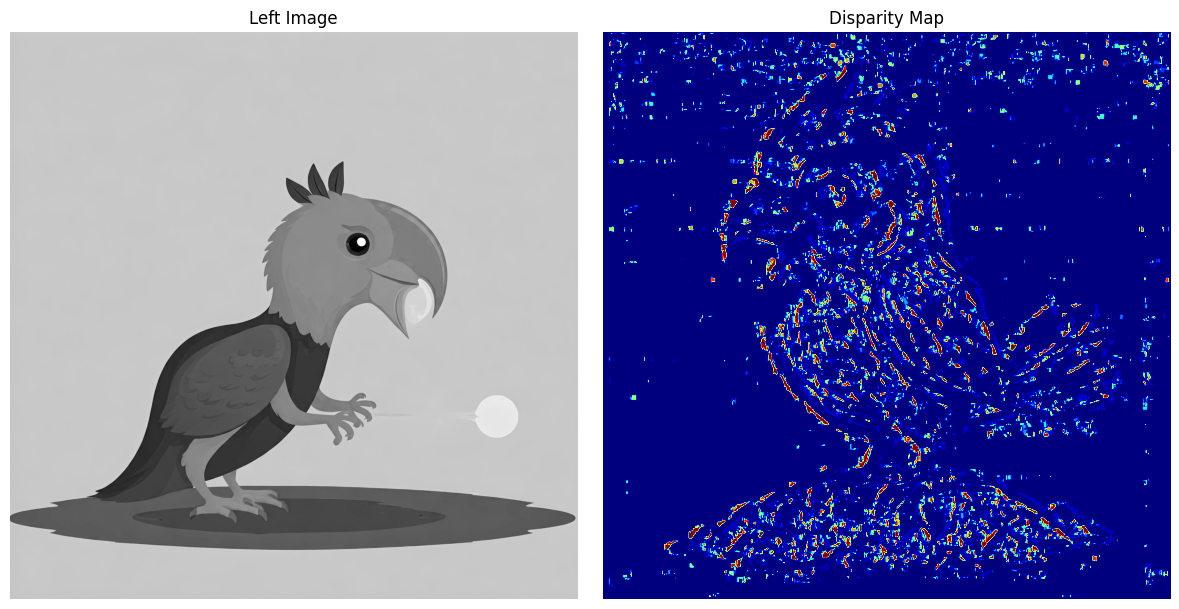

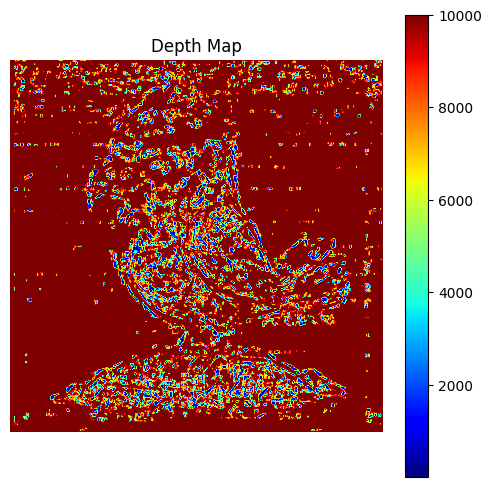

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo images (left and right images)
left_image = cv2.imread('/content/left.jpg', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('/content/right.jpg', cv2.IMREAD_GRAYSCALE)

# Stereo Calibration parameters (for simplicity, assuming these are known or calibrated)
# These would typically be obtained through camera calibration process
focal_length = 1.0  # Example focal length (in pixels)
baseline = 0.1  # Example baseline between cameras (in meters)

# Stereo block matching to compute disparity map
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left_image, right_image)

# Normalize disparity map for display
disparity_normalized = cv2.normalize(disparity, disparity, 0, 255, cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Display the disparity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Left Image')
plt.imshow(left_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Disparity Map')
plt.imshow(disparity_normalized, cmap='jet')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate depth map from disparity (Z = f * B / d)
depth_map = (focal_length * baseline) / (disparity.astype(np.float32) + 1e-5)  # Avoid division by zero

# Display depth map
plt.figure(figsize=(6, 6))
plt.title('Depth Map')
plt.imshow(depth_map, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()


cv2: This line imports the OpenCV library, which is a powerful tool for computer vision tasks like image processing.
numpy as np: This line imports the NumPy library, used for numerical computations, especially with arrays.
matplotlib.pyplot as plt: This line imports the Matplotlib library, which is used for creating visualizations, like plotting images.
2. Loading and Preprocessing the Image:


# Load the image
image = cv2.imread('/content/left_cleanup.jpg')  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply Gaussian Blur to reduce noise and avoid false edges
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
Use code with caution
cv2.imread(): This function loads the image specified by the path (/content/left_cleanup.jpg) into the image variable.
cv2.cvtColor(): This function converts the loaded image (image) to grayscale and stores it in gray_image. Edge detection often works better on grayscale images.
cv2.GaussianBlur(): This function applies a Gaussian blur to the gray_image. Blurring helps to reduce noise and unwanted details before edge detection. The (5, 5) argument specifies the size of the blur kernel, and 0 is the standard deviation for the Gaussian distribution.
3. Canny Edge Detection:


# Perform Canny edge detection to detect edges (boundaries)
edges = cv2.Canny(blurred_image, 100, 200)  # The thresholds can be adjusted
Use code with caution
cv2.Canny(): This is the core function for Canny edge detection. It takes the blurred image as input, along


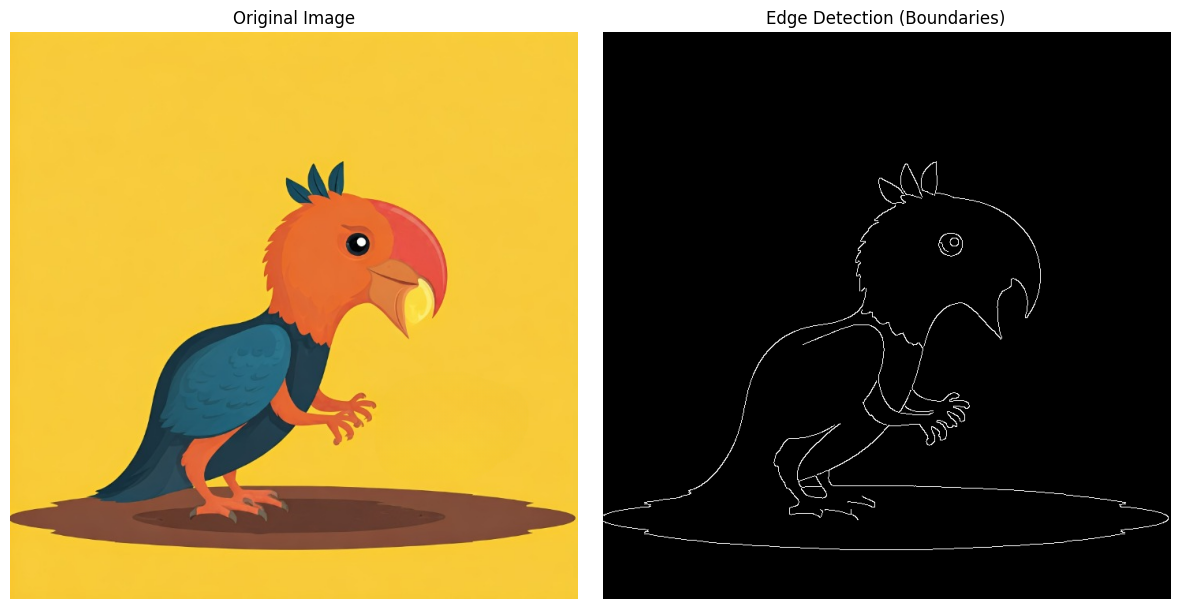

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/left_cleanup.jpg')  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Apply Gaussian Blur to reduce noise and avoid false edges
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform Canny edge detection to detect edges (boundaries)
edges = cv2.Canny(blurred_image, 100, 200)  # The thresholds can be adjusted

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Edge Detection Result
plt.subplot(1, 2, 2)
plt.title('Edge Detection (Boundaries)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo pair (left and right images)
left_image = cv2.imread('/content/left.jpg', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('/content/right.jpg', cv2.IMREAD_GRAYSCALE)

# Stereo camera parameters (These would typically come from camera calibration)
focal_length = 1.0  # Example focal length in pixels (from camera calibration)
baseline = 0.1  # Example baseline (distance between the two cameras in meters)

# Step 1: Stereo Block Matching (Disparity Calculation)
# Use StereoBM (Block Matching) to compute disparity
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left_image, right_image)

# Normalize the disparity image for visualization
disparity_normalized = cv2.normalize(disparity, disparity, 0, 255, cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Step 2: Depth Map Calculation
# Depth map (Z = f * B / disparity)
depth_map = (focal_length * baseline) / (disparity.astype(np.float32) + 1e-5)  # Adding small value to avoid division by zero

# Step 3: Display Results

# Display the disparity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Disparity Map')
plt.imshow(disparity_normalized, cmap='jet')
plt.axis('off')

# Display the depth map
plt.subplot(1, 2, 2)
plt.title('Depth Map')
plt.imshow(depth_map, cmap='jet')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

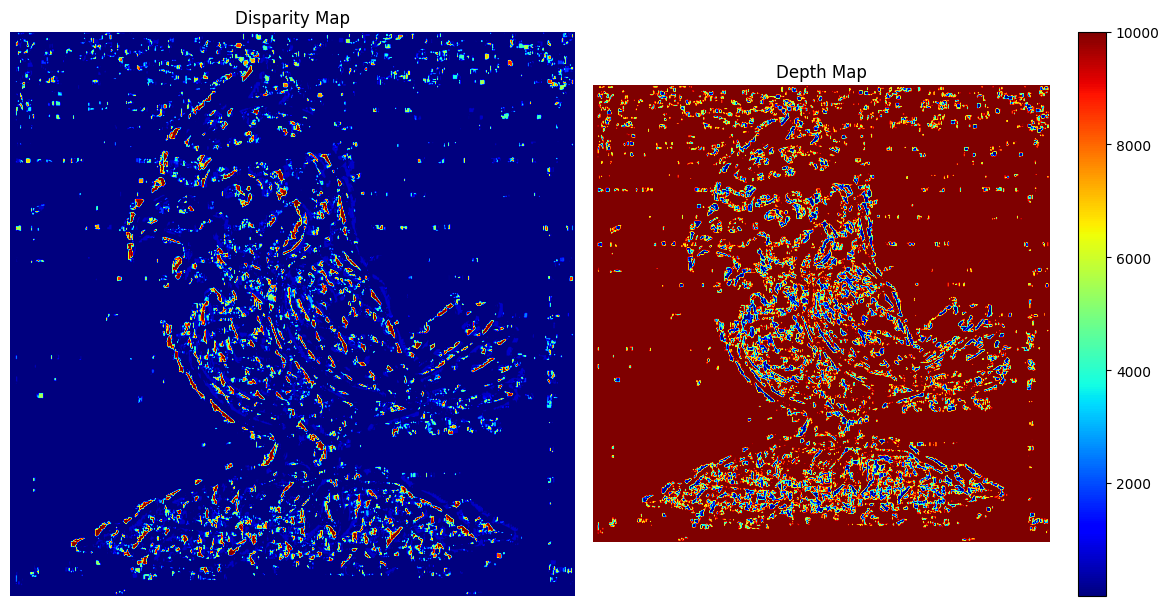

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo pair (left and right images)
left_image = cv2.imread('/content/left.jpg', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('/content/right.jpg', cv2.IMREAD_GRAYSCALE)

# Stereo camera parameters (These would typically come from camera calibration)
focal_length = 1.0  # Example focal length in pixels (from camera calibration)
baseline = 0.1  # Example baseline (distance between the two cameras in meters)

# Step 1: Stereo Block Matching (Disparity Calculation)
# Use StereoBM (Block Matching) to compute disparity
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(left_image, right_image)

# Normalize the disparity image for visualization
disparity_normalized = cv2.normalize(disparity, disparity, 0, 255, cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Step 2: Depth Map Calculation
# Depth map (Z = f * B / disparity)
depth_map = (focal_length * baseline) / (disparity.astype(np.float32) + 1e-5)  # Adding small value to avoid division by zero

# Step 3: Display Results

# Display the disparity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Disparity Map')
plt.imshow(disparity_normalized, cmap='jet')
plt.axis('off')

# Display the depth map
plt.subplot(1, 2, 2)
plt.title('Depth Map')
plt.imshow(depth_map, cmap='jet')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()
